In [1]:
import pandas as pd
a= pd.read_csv('/content/test.csv')
print(a)

              ID  Estimated_Insects_Count  Crop_Type  Soil_Type  \
0      F00000002                      188          1          1   
1      F00000007                      410          1          1   
2      F00000011                      626          1          0   
3      F00000013                      731          1          0   
4      F00000014                      789          0          0   
...          ...                      ...        ...        ...   
59305  F00155937                     3337          1          0   
59306  F00155940                     3516          1          0   
59307  F00155941                     3702          1          0   
59308  F00155943                     3702          1          0   
59309  F00155944                     3895          1          0   

       Pesticide_Use_Category  Number_Doses_Week  Number_Weeks_Used  \
0                           1                  0                NaN   
1                           1                  0     

In [2]:
a = a.sample(n=1000)

# Save the new dataset to a CSV file
a.to_csv('new_dataset.csv', index=False)

In [3]:
print(a.isnull().sum())

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          105
Number_Weeks_Quit            0
Season                       0
dtype: int64


In [4]:
a["Number_Weeks_Used"].fillna(0, inplace = True)

In [5]:
aa=a.drop('ID',axis=1)

In [6]:
y=aa['Number_Weeks_Quit']
print("THE TARGET VAIRIABLE")
print(y)

THE TARGET VAIRIABLE
49814     1
41945     6
35772     0
57432     4
34116     0
         ..
26263     3
52920     0
26102    21
53710    15
11247     3
Name: Number_Weeks_Quit, Length: 1000, dtype: int64


In [7]:
x=aa.drop('Number_Weeks_Quit',axis=1)
print(x)

       Estimated_Insects_Count  Crop_Type  Soil_Type  Pesticide_Use_Category  \
49814                     1296          0          0                       2   
41945                     2015          0          1                       2   
35772                     1478          0          0                       3   
57432                      984          1          0                       2   
34116                     1385          0          0                       3   
...                        ...        ...        ...                     ...   
26263                     2402          0          0                       2   
52920                     1056          1          0                       3   
26102                     1385          0          0                       2   
53710                     1212          0          1                       2   
11247                      732          0          1                       2   

       Number_Doses_Week  Number_Weeks_

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

       Estimated_Insects_Count  Crop_Type  Soil_Type  Pesticide_Use_Category  \
13084                     1385          0          1                       2   
53905                     2541          0          1                       2   
10238                      448          0          0                       3   
54423                     1478          0          0                       3   
47754                      411          1          0                       3   
...                        ...        ...        ...                     ...   
16789                     1056          1          0                       2   
46040                      488          1          0                       3   
36459                     2267          0          0                       2   
5294                      1296          0          1                       3   
15141                      984          1          0                       2   

       Number_Doses_Week  Number_Weeks_

In [9]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [10]:
#svm model
from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=0)

svm_classifier.fit(x_train, y_train)

y_pred = svm_classifier.predict(x_test)
print(y_pred)

[ 0 17  0  0  2  0  2 20 10  0 15 13  0 20 15 17 17  0  0 15 15 13 17  0
 17 10  0 10 10  2 10 10  0  0 10 20 20  0 13  0 20  0  0  0  0 20  0 15
  0  0  0  2 10 20 10 10  0 20 14 10 15  0 20  0  2  0  0 20 20  0 15 20
 20  0  4 20 17 15 14 17  0  0 20  0  0 10  2  2 10  0  2 10  0 10  0 14
  0  0 15 20  0  0 15  0 14 10 20  0  0  0 20  0  0  0  0  0  0  0 10 20
 15 10  0  0 10 10 10  0 14 10  2 19  0 20 10  0 10 10 15 20 20  2 10 20
  2  0 15  0 15  0 15 10 10 20 20  0 10 15 10  0  0 20 10  0  0  0 14  0
 20  0 15  0 15  0 15 16  0 10 13 10 17 10 20 13  2  0  0  0  0  0  0 19
  0 17  0  0 10  0  0 20]


In [11]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy using SVM model:", accuracy)

Accuracy using SVM model: 0.32


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy using logistic regression:', accuracy)

Accuracy using logistic regression: 0.335


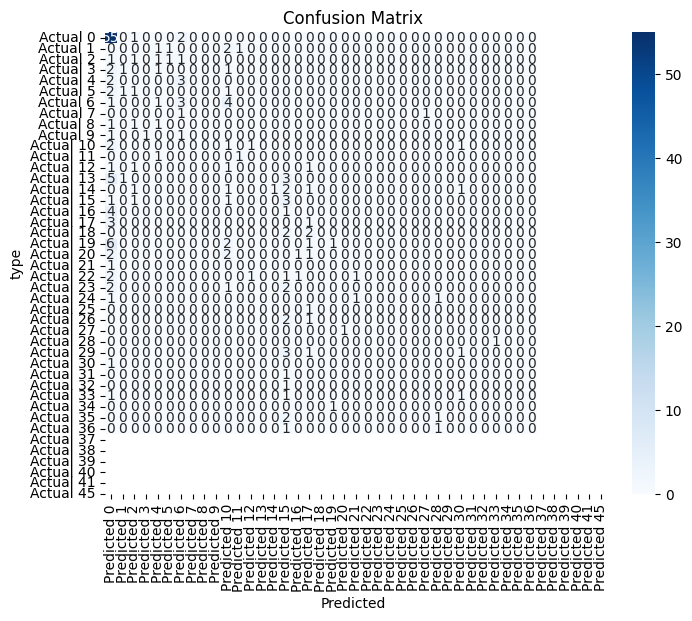

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Predicted {i}' for i in set(y)],
            yticklabels=[f'Actual {i}' for i in set(y)])
plt.xlabel('Predicted')
plt.ylabel('type')
plt.title('Confusion Matrix')
plt.show()
